1) Data Preprocessing and Visualization

In [2]:
import pandas as pd

df = pd.read_csv('bitcoin_data.csv')
print(df.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


<ipython-input-3-de62916ec372>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')


Missing values before cleaning:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Missing values after cleaning:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


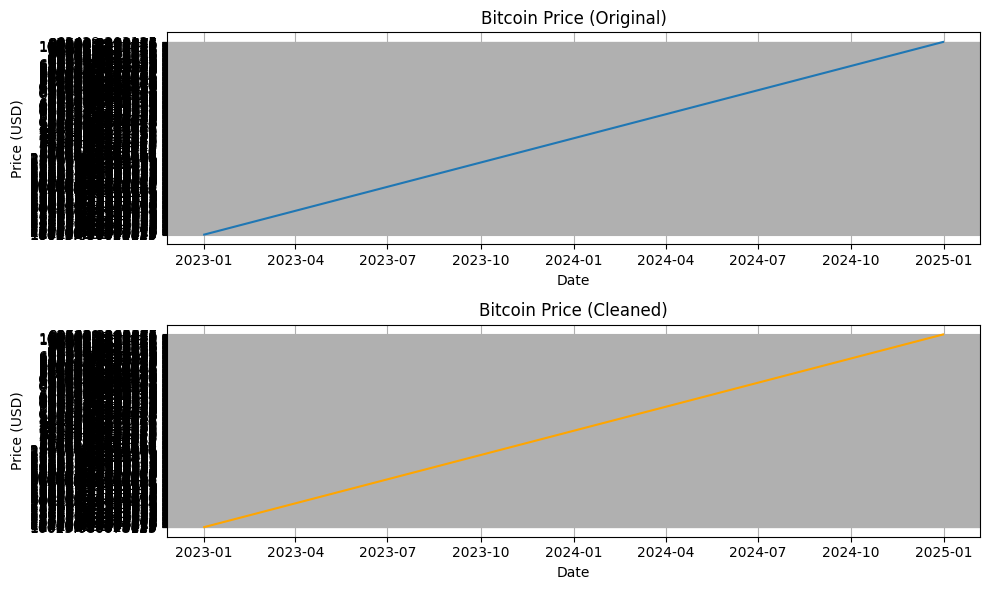

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV, make sure column names are clean
btc = pd.read_csv('bitcoin_data.csv')
btc.rename(columns={btc.columns[0]: 'Date'}, inplace=True)

# Step 2: Clean and parse date column
btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')

# Step 3: Drop rows where Date is NaT
btc.dropna(subset=['Date'], inplace=True)

# Step 4: Set Date as index
btc.set_index('Date', inplace=True)

# Step 5: Check and fill missing values
print("Missing values before cleaning:")
print(btc.isnull().sum())

btc_filled = btc.ffill()

print("Missing values after cleaning:")
print(btc_filled.isnull().sum())

# Step 6: Plot before and after cleaning
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(btc.index, btc['Close'], label='Original Data')
plt.title('Bitcoin Price (Original)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(btc_filled.index, btc_filled['Close'], label='Cleaned Data', color='orange')
plt.title('Bitcoin Price (Cleaned)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()



2) Load Cleaned Data

In [ ]:
btc = btc_filled.copy()
btc = btc[['Close']]
btc['Close'] = pd.to_numeric(btc['Close'], errors='coerce')
btc = btc.dropna(subset=['Close'])


3) ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(btc['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.29137938786515366
p-value: 0.9769455026047971


4) ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(btc['Close'], order=(5, 1, 2))  # Adjusted q from 0 to 2
arima_result = arima_model.fit()
print(arima_result.summary())


arima_forecast = arima_result.forecast(steps=100)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  731
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -6315.750
Date:                Fri, 09 May 2025   AIC                          12647.501
Time:                        07:56:42   BIC                          12684.245
Sample:                    01-01-2023   HQIC                         12661.677
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0497      0.265     -3.968      0.000      -1.568      -0.531
ar.L2         -0.2499      0.248     -1.007      0.314      -0.736       0.236
ar.L3         -0.0047      0.044     -0.106      0.9

5) Forecast with ARIMA (Next 100 days)

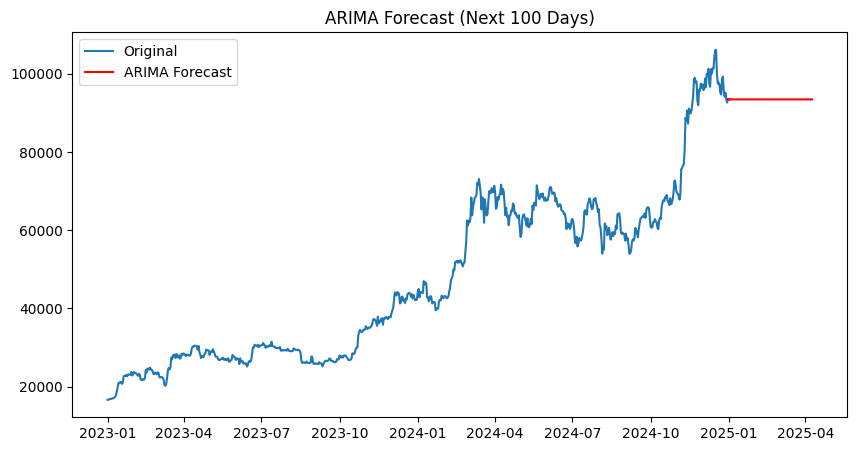

In [ ]:
# Forecast next 100 days
arima_forecast = arima_result.forecast(steps=100)

plt.figure(figsize=(10,5))
plt.plot(btc.index, btc['Close'], label='Original')
plt.plot(pd.date_range(start=btc.index[-1], periods=100, freq='D'), arima_forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast (Next 100 Days)")
plt.show()


6) SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    btc['Close'],
    order=(2,1,2),                # Adjusted (p,d,q)
    seasonal_order=(1,1,1,7)      # Changed seasonality to weekly (7) for short-term patterns
)
sarima_result = sarima_model.fit()
print(sarima_result.summary())


sarima_forecast = sarima_result.forecast(steps=100)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  731
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -6327.752
Date:                             Fri, 09 May 2025   AIC                          12669.504
Time:                                     07:57:09   BIC                          12701.588
Sample:                                 01-01-2023   HQIC                         12681.887
                                      - 12-31-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0298      0.018    -56.115      0.000      -1.066      -0.994
ar.L2         -0.9982      

7) Forecast with SARIMA (Next 100 Days)

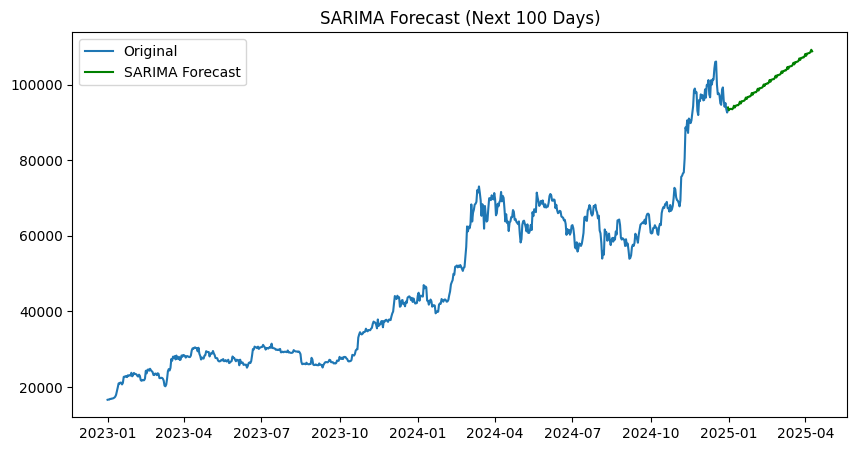

In [ ]:
sarima_forecast = sarima_result.forecast(steps=100)

plt.figure(figsize=(10,5))
plt.plot(btc.index, btc['Close'], label='Original')
plt.plot(pd.date_range(start=btc.index[-1], periods=100, freq='D'), sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title("SARIMA Forecast (Next 100 Days)")
plt.show()


8) Compare ARIMA vs SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

    Model           MAE           MSE   MAPE (%)
0   ARIMA  18695.913188  5.648511e+08  20.159310
1  SARIMA  14663.094232  3.598226e+08  15.748202


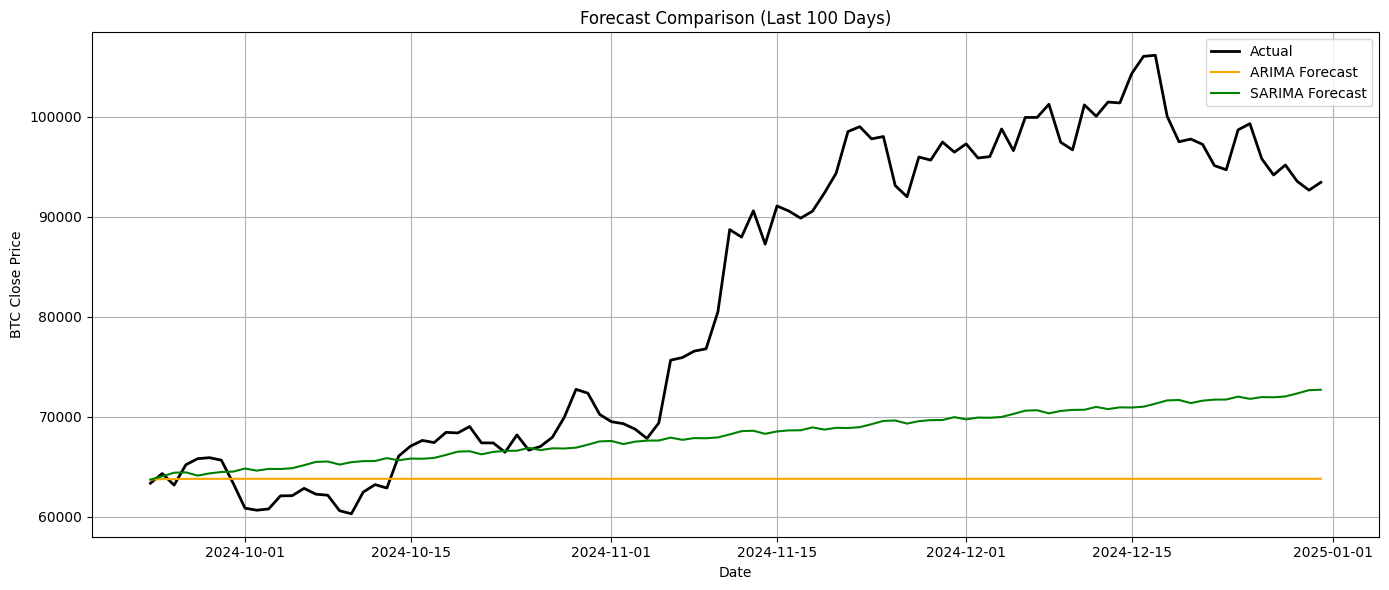

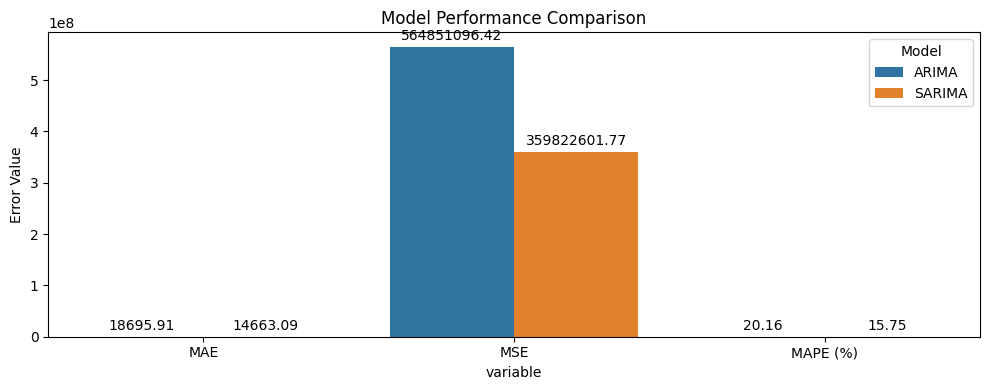

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

train = btc['Close'][:-100]
test = btc['Close'][-100:]

# Re-fit models on train
arima = ARIMA(train, order=(5,1,0)).fit()
arima_pred = arima.forecast(steps=100)

sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
sarima_pred = sarima.forecast(steps=100)

def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    mape = (abs(true - pred) / true).mean() * 100
    return mae, mse, mape

arima_mae, arima_mse, arima_mape = evaluate_model(test, arima_pred)
sarima_mae, sarima_mse, sarima_mape = evaluate_model(test, sarima_pred)

metrics_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA'],
    'MAE': [arima_mae, sarima_mae],
    'MSE': [arima_mse, sarima_mse],
    'MAPE (%)': [arima_mape, sarima_mape]
})

print(metrics_df)

plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual', color='black', linewidth=2)
plt.plot(test.index, arima_pred, label='ARIMA Forecast', color='orange')
plt.plot(test.index, sarima_pred, label='SARIMA Forecast', color='green')
plt.title('Forecast Comparison (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=metrics_df.melt(id_vars='Model'), x='variable', y='value', hue='Model')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Model Performance Comparison')
plt.ylabel('Error Value')
plt.tight_layout()
plt.show()


In [ ]:
# Average predicted price for April and May 2025
print("ARIMA March Avg:", arima_forecast['2025-03-01':'2025-03-30'].mean())
print("SARIMA March Avg:", sarima_forecast['2025-03-01':'2025-03-30'].mean())

print("ARIMA April Avg:", arima_forecast['2025-04-01':'2025-04-30'].mean())
print("SARIMA April Avg:", sarima_forecast['2025-04-01':'2025-04-30'].mean())


ARIMA March Avg: 93450.30757912653
SARIMA March Avg: 104891.65426243075
ARIMA April Avg: 93450.3075797258
SARIMA April Avg: 108347.24514969652
